<a href="https://colab.research.google.com/github/TedHaley/courses/blob/master/statistical_thinking_in_python_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


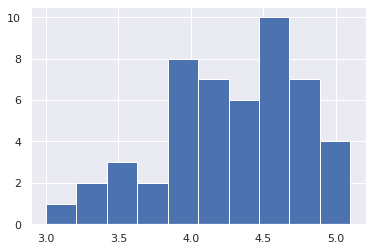

In [1]:
# Import plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()

df = pd.DataFrame(data['data'],
        columns=data['feature_names']
    )

df['species'] = data['target']
df['species']=df['species'].apply(lambda x: data['target_names'][x])

df_versicolor = df[df['species']=='versicolor']

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(df_versicolor['petal length (cm)'])

# Show histogram
plt.show()


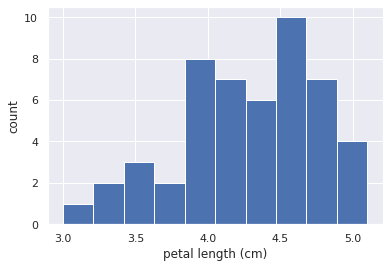

In [2]:
# Setting axis labels
versicolor_petal_length = df_versicolor['petal length (cm)']

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count') 

# Show histogram
plt.show()

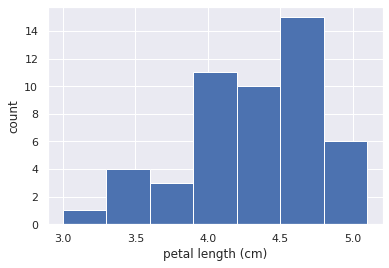

In [3]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

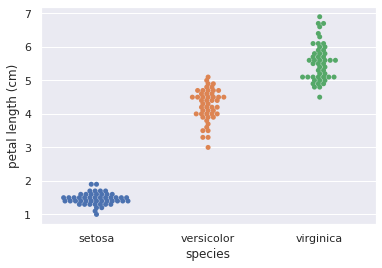

In [4]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [0]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements.
    Empirical distribution function
    """
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

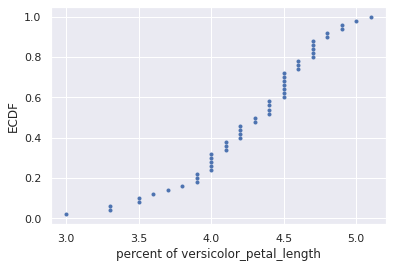

In [6]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('percent of versicolor_petal_length') 
_ = plt.ylabel('ECDF') 

# Display the plot
plt.show()

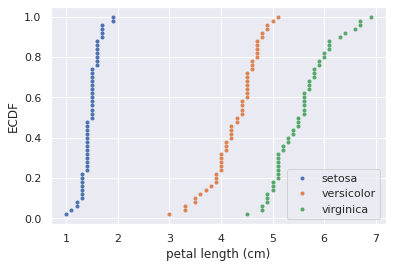

In [7]:
df_setosa = df[df['species']=='setosa']
df_virginica = df[df['species']=='virginica']

setosa_petal_length = df_setosa['petal length (cm)']
virginica_petal_length = df_virginica['petal length (cm)']

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

In [8]:
# Percentiles
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


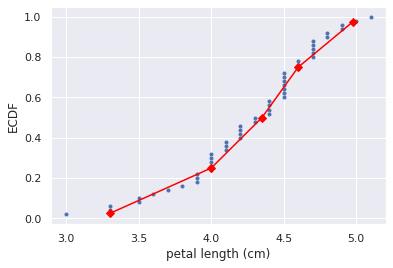

In [9]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle=None)

# Show the plot
plt.show()

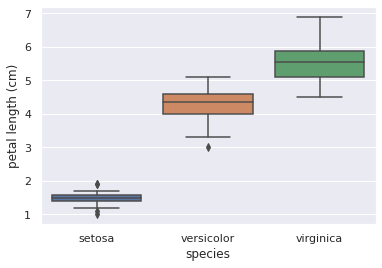

In [10]:
# Box plots to show variance
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

In [11]:
# Calculate the variance from scratch and by using numpy
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


In [12]:
# Ditto with standard deviation
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845204
0.4651881339845204


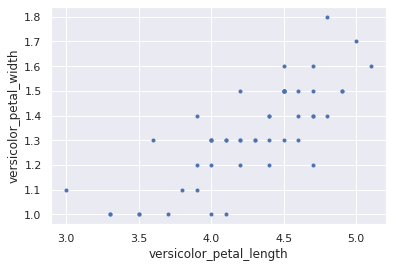

In [13]:
versicolor_petal_length = df_versicolor['petal length (cm)']
versicolor_petal_width = df_versicolor['petal width (cm)']

# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

In [14]:
# Covariance
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [15]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


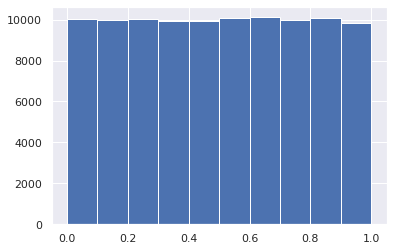

In [16]:
# Hacker statistics to simulate probabilities
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

# This is a uniform distribution because each bin is almost equal.

In [0]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

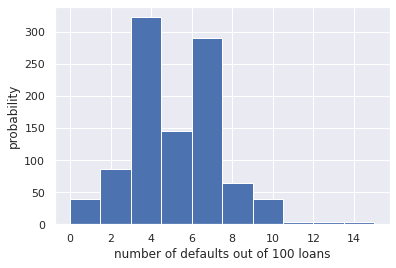

In [18]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(n = 100, p = 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


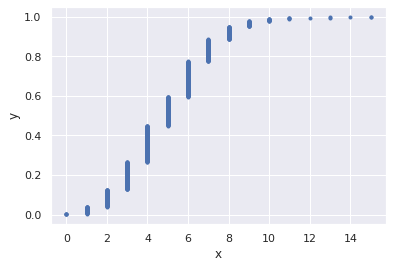

Probability of losing money = 0.022


In [19]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


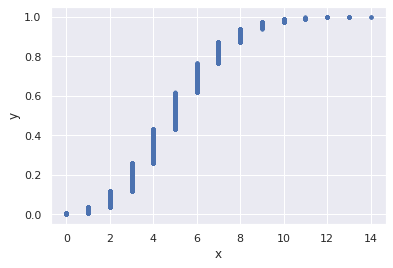

In [20]:
# PMF Probability Mass Function: Discrete Probability Distribution
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


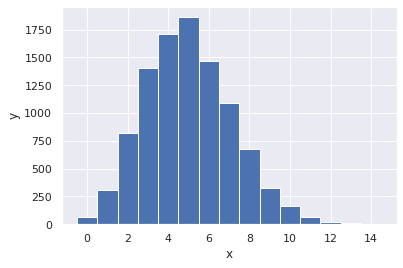

In [21]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, bins=bins)

# Label axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

In [22]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
# mean = n * p = 10
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
  
    #n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. 
    samples_binomial = np.random.binomial(n=n[i], p=p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


In [23]:
# Poisson Probability
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson((251/115), 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0072


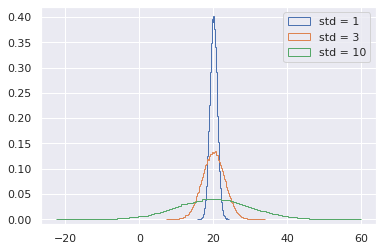

In [24]:
# Normal Distribution
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
#loc -> mean
#scale -> std
#size -> samples
samples_std1=np.random.normal(loc=20, scale=1, size=100000)
samples_std3=np.random.normal(loc=20, scale=3, size=100000)
samples_std10=np.random.normal(loc=20, scale=10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


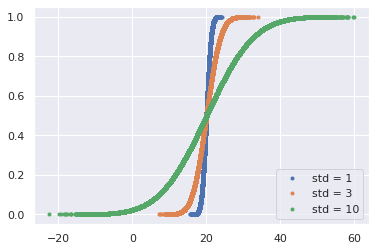

In [25]:
# Generate CDFs
x_std1,y_std1=ecdf(samples_std1)
x_std3,y_std3=ecdf(samples_std3)
x_std10,y_std10=ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1,y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3,y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std10,y_std1, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


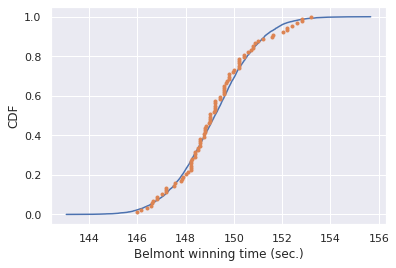

In [26]:
# Approximate normal distribution
belmont_no_outliers = '148.51 146.65 148.52 150.7  150.42 150.88 151.57 147.54 149.65 148.74\
 147.86 148.75 147.5  148.26 149.71 146.56 151.19 147.88 149.16 148.82\
 148.96 152.02 146.82 149.97 146.13 148.1  147.2  146.   146.4  148.2\
 149.8  147.   147.2  147.8  148.2  149.   149.8  148.6  146.8  149.6\
 149.   148.2  149.2  148.   150.4  148.8  147.2  148.8  149.6  148.4\
 148.4  150.2  148.8  149.2  149.2  148.4  150.2  146.6  149.8  149.\
 150.8  148.6  150.2  149.   148.6  150.2  148.2  149.4  150.8  150.2\
 152.2  148.2  149.2  151.   149.6  149.6  149.4  148.6  150.   150.6\
 149.2  152.6  152.8  149.6  151.6  152.8  153.2  152.4  152.2'

belmont_no_outliers = [float(i) for i in belmont_no_outliers.split(' ') if i != '']

# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x,y=ecdf(belmont_no_outliers)
x_theor, y_theor=ecdf(samples)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


In [27]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / 1000000

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000599


In [0]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

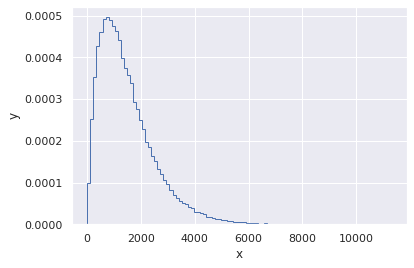

In [33]:
'''
Now, you'll use your sampling function to compute the waiting time to observe a
 no-hitter and hitting of the cycle. 
 The mean waiting time for a no-hitter is 764 games, and the mean waiting 
 time for hitting the cycle is 715 games.
'''
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(tau1=764, tau2=715, size=100000)

# Generate histogram
_ = plt.hist(waiting_times, bins=100, histtype='step', density=True)

# Label axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

